<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-murasakiw/blob/main/Regresion_lineal_polinomial_A01794338.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ciencia y Analítica de Datos
 ___ 
Actividad Semanal 7: Regresiones y K-means  
Nombre: Sergio Omar Esparza Hernández  
Matrícula: A01794338

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

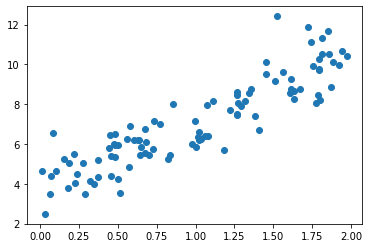

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

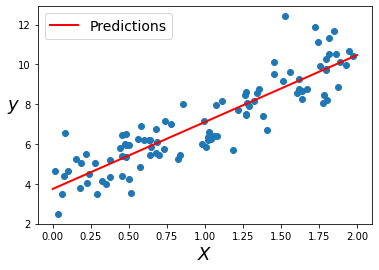

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

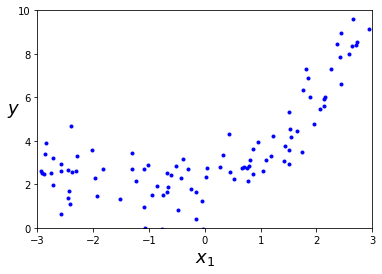

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

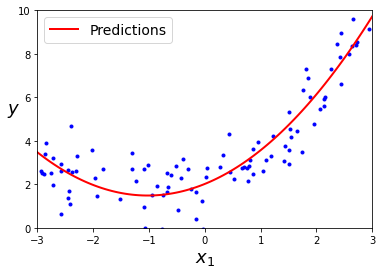

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1), (200, 1), (800,), (200,))

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

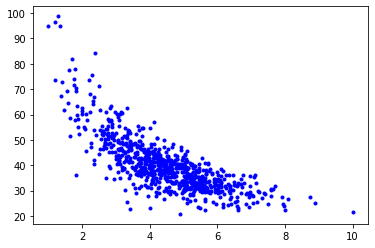

In [ ]:
plt.plot(X_train,y_train,'b.')

##Lineal

In [ ]:
lista_mae = list()
lista_rc = list()

In [ ]:
#lineal
linear_reg1 = LinearRegression(fit_intercept=True)
linear_reg1.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_reg1.coef_

array([-6.06532811])

In [ ]:
linear_reg1.intercept_

67.11966157000515

In [ ]:
x_fit2 = pd.DataFrame(np.linspace(0, 10, 800))
x_fit2.columns = ['Number of Units']

In [ ]:
y_pred = linear_reg1.predict(x_fit2)

In [ ]:
y_pred_g = linear_reg1.predict(X_test)

In [ ]:
linear_reg1.coef_, linear_reg1.intercept_

(array([-6.06532811]), 67.11966157000515)

$\hat{y} =  -6X + 66.9762$

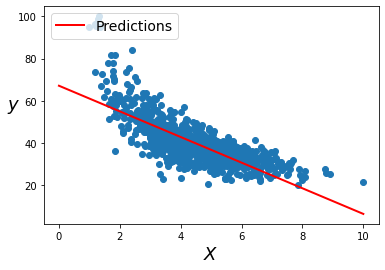

In [ ]:
plt.scatter(X, y)
plt.plot(x_fit2, y_pred, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$X$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14);

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
lista_mae.append(metrics.mean_absolute_error(y_test, y_pred_g))
lista_rc.append(r2_score(y_test, y_pred_g))
print('Error medio Absoluto (MAE):', lista_mae[0])
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_g)))
print('r2_score', lista_rc[0])

Error medio Absoluto (MAE): 5.258989429618237
Root Mean Squared Error: 7.366177821309595
r2_score 0.5550818583506523


##Polinomial

In [ ]:
#polinomial

In [ ]:
x_poli = PolynomialFeatures(degree=4, include_bias=False)
x_new_p = x_poli.fit_transform(X_train)

In [ ]:
linear_reg_poli = LinearRegression()
linear_reg_poli.fit(x_new_p, y_train)

LinearRegression()

In [ ]:
x_fit_poli = pd.DataFrame(np.linspace(0, 10, 800))
x_fit_poli = x_poli.fit_transform(x_fit_poli)
x_test_poli = x_poli.fit_transform(X_test)
#x_fit_poli.columns = ['Number of Units']

In [ ]:
y_pred_poli = linear_reg_poli.predict(x_fit_poli)

In [ ]:
y_pred_test = linear_reg_poli.predict(x_test_poli)

In [ ]:
linear_reg_poli.coef_, linear_reg_poli.intercept_

(array([-4.99861382e+01,  1.09097280e+01, -1.13207772e+00,  4.39614739e-02]),
 126.98991566242995)

$\hat{y} =  127.76-49.97X +10.72X^2 -1.09X^3+0.041X^4$

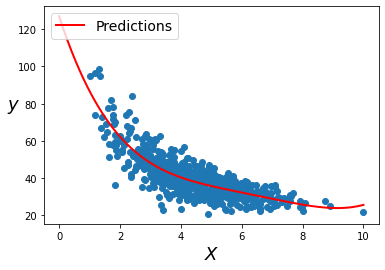

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(x_fit2, y_pred_poli, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$X$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14);

In [ ]:
x_fit2.shape, y_pred_poli.shape

((800, 1), (800,))

In [ ]:
lista_mae.append(metrics.mean_absolute_error(y_test, y_pred_test))
lista_rc.append(r2_score(y_test, y_pred_test))
print('Error medio Absoluto (MAE):', lista_mae[1])
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print('r2_score', lista_rc[1])

Error medio Absoluto (MAE): 4.788099639177315
Root Mean Squared Error: 6.141541823315711
r2_score 0.6907209200526565


##Ridge

In [ ]:
#Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
x_ridge = PolynomialFeatures(degree=4, include_bias=False)
x_new_ridge = x_ridge.fit_transform(X_train)

In [ ]:
X_train.shape

(800, 1)

In [ ]:
ridge_reg = Ridge()
ridge_reg.fit(x_new_ridge, y_train)

Ridge()

In [ ]:
x_fit_ridge = pd.DataFrame(np.linspace(0, 10, 800))
x_g_ridge = x_fit_ridge
x_fit_ridge = x_ridge.fit_transform(x_fit_ridge)
x_test_ridge = x_ridge.fit_transform(X_test)

In [ ]:
y_pred_ridge = ridge_reg.predict(x_fit_ridge)

In [ ]:
y_p_test_r = ridge_reg.predict(x_test_ridge)

In [ ]:
ridge_reg.coef_, ridge_reg.intercept_

(array([-2.47823743e+01,  2.65182022e+00, -3.01610764e-02, -7.13899900e-03]),
 101.057549659955)

Modelo obtenido con penalización Ridge.

$\hat{y} =  101.06-24.78X +2.65X^2 -0.0301X^3-0.0071X^4$

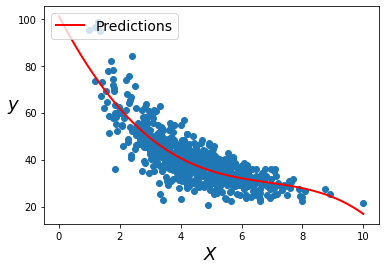

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(x_g_ridge.values, y_pred_ridge, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$X$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14);

In [ ]:
lista_mae.append(metrics.mean_absolute_error(y_test, y_p_test_r))
lista_rc.append(r2_score(y_test, y_p_test_r))
print('Error medio Absoluto (MAE):', lista_mae[2])
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_p_test_r)))
print('r2_score', lista_rc[2])

Error medio Absoluto (MAE): 4.805577690059507
Root Mean Squared Error: 6.307314888681844
r2_score 0.673799408540084


##Lasso

In [ ]:
#Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
x_lasso = PolynomialFeatures(degree=4, include_bias=False)
x_new_lasso = x_lasso.fit_transform(X_train)

In [ ]:
lasso_reg = Lasso(max_iter=6000)
lasso_reg.fit(x_new_lasso, y_train)

Lasso(max_iter=6000)

In [ ]:
x_fit_lasso = pd.DataFrame(np.linspace(0, 10, 800))
x_g_lasso = x_fit_lasso
x_fit_lasso = x_lasso.fit_transform(x_fit_lasso)
x_test_lasso = x_lasso.fit_transform(X_test)

In [ ]:
y_pred_lasso = lasso_reg.predict(x_fit_lasso)

In [ ]:
y_p_test_l = lasso_reg.predict(x_test_lasso)

In [ ]:
lasso_reg.coef_, lasso_reg.intercept_

(array([-0.        , -2.92437692,  0.42441541, -0.01660431]),
 65.91514424490019)

Modelo obtenido con penalización Lasso

$\hat{y} =  65.92 -2.92X^2 +0.42X^3 -0.016X^4$

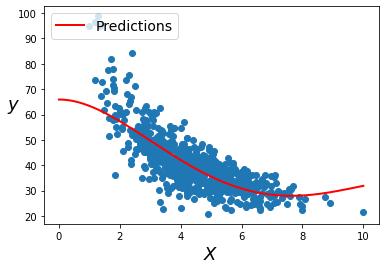

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(x_g_lasso.values, y_pred_lasso, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$X$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14);

In [ ]:
lista_mae.append(metrics.mean_absolute_error(y_test, y_p_test_l))
lista_rc.append(r2_score(y_test, y_p_test_l))
print('Error medio Absoluto (MAE):', lista_mae[3])
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_p_test_l)))
print('r2_score', lista_rc[3])

Error medio Absoluto (MAE): 4.9462819170128425
Root Mean Squared Error: 6.927194258456396
r2_score 0.6065310642025599


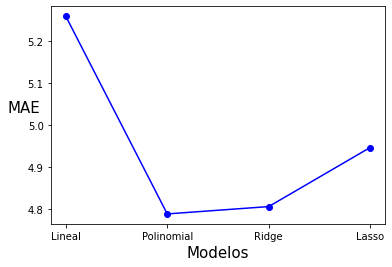

In [ ]:
modelos = ['Lineal', 'Polinomial', 'Ridge', 'Lasso']
plt.plot(modelos, lista_mae, 'b-', marker = 'o')
plt.xlabel('Modelos', fontsize=15)
plt.ylabel('MAE', rotation=0, fontsize=15);

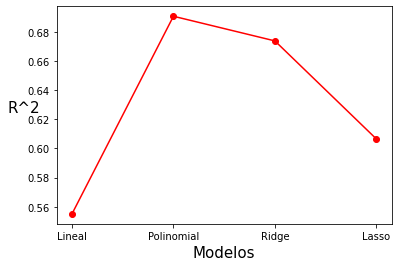

In [ ]:
modelos = ['Lineal', 'Polinomial', 'Ridge', 'Lasso']
plt.plot(modelos, lista_rc, 'r-', marker = 'o')
plt.xlabel('Modelos', fontsize=15)
plt.ylabel('R^2', rotation=0, fontsize=15);

En este caso conviene seleccionar el modelo de regresión lineal simple, pero utilizando la transformación polinomial de los factores de entrada. Este fue el modelo con el se obtuvieron mejores valores en las métricas de error. Como primera aproximación, se observa que el modelo lineal simple es muy básico para describir el comportamiento de estos datos. Los modelos polinomial, ridge y lasso pueden ser ajustados para mejorar el desempeño de estos modelos. Se utilizó un porcentaje de datos de entrenamiento correspondiente al 80% del total de los datos y el porcentaje restante se utilizó para evaluación del modelo. En general se obtienen valores de error MAE aceptables, se puede saber que son aceptables porque se comparan con la escala de los datos. En este caso, los valores de MAE no representan una gran diferencia entre los valores esperados y los valores predichos, pero estos errores se podrían disminuir buscando los mejores parámetros de cada uno de los modelos, excepto en el modelo lineal simple, que se descartó por ser demasiado simple.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2009,2472930270,20140905T000000,485000.0,3,2.50,3110,9015,2.0,0,0,...,9,3110,0,1990,0,98058,47.4369,-122.147,2650,8960
10936,8562750060,20150420T000000,825000.0,5,3.50,4140,6770,2.0,0,0,...,9,3030,1110,2004,0,98027,47.5381,-122.069,3960,5431
17749,7934000090,20150225T000000,340000.0,2,1.00,690,5200,1.0,0,0,...,6,690,0,1918,0,98136,47.5560,-122.395,1380,5700
20488,8691440220,20150202T000000,1289990.0,5,4.00,4360,8030,2.0,0,0,...,10,4360,0,2015,0,98075,47.5923,-121.973,3570,6185
9439,4302201085,20140918T000000,248000.0,3,1.00,1470,7680,1.0,0,0,...,7,1220,250,1946,0,98106,47.5276,-122.359,1470,6784
19890,5045700400,20150223T000000,559950.0,5,2.75,2990,6370,2.0,0,0,...,8,2990,0,2014,0,98059,47.4853,-122.154,2730,5740
5076,5100402764,20150415T000000,740000.0,3,1.00,1230,6380,1.5,0,0,...,7,1230,0,1927,0,98115,47.6947,-122.315,1250,6380
235,1762600320,20140610T000000,1025000.0,5,4.00,3760,28040,2.0,0,0,...,10,3760,0,1983,0,98033,47.6489,-122.183,3430,35096
3381,7854800090,20141107T000000,799950.0,3,3.00,2900,11769,2.0,0,0,...,10,2900,0,1997,0,98052,47.6993,-122.118,2900,9611
13497,1657530450,20141222T000000,289950.0,3,2.50,1870,1436,2.0,0,0,...,7,1870,0,2004,0,98059,47.4899,-122.166,1720,1852


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


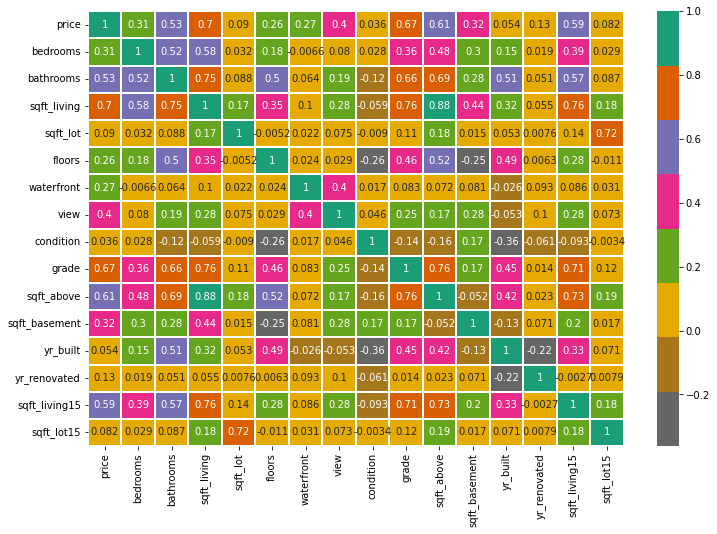

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


##Regresión Lineal Múltiple

In [ ]:
lista_mae1 = list()
lista_rc1 = list()

In [ ]:
#Entrenamiento del modelo
ml_reg = LinearRegression()
ml_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Coeficientes del modelo obtenido
print(f'Coeficientes del modelo obtenido: {ml_reg.coef_} , {ml_reg.intercept_}')

Coeficientes del modelo obtenido: [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750272e+01  6.02175567e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]] , [6151359.26274133]


In [ ]:
yh_test = ml_reg.predict(X_test)

In [ ]:
lista_mae1.append(metrics.mean_absolute_error(y_test, yh_test))
lista_rc1.append(r2_score(y_test, yh_test))
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yh_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yh_test)))
print('r2_score', r2_score(y_test, yh_test))

Error medio Absoluto (MAE): 137480.13882731603
Root Mean Squared Error: 232133.36762408566
r2_score 0.6579723205007496


##Regresión Polinomial Múltiple

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
x_poli = PolynomialFeatures(degree=2, include_bias=False)
modelo = LinearRegression()
pipeline = Pipeline(steps = [('trans_poli', x_poli), ('LR', modelo)])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('trans_poli', PolynomialFeatures(include_bias=False)),
                ('LR', LinearRegression())])

In [ ]:
yt_pred = pipeline.predict(X_test)

In [ ]:
lista_mae1.append(metrics.mean_absolute_error(y_test, yt_pred))
lista_rc1.append(r2_score(y_test, yt_pred))
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yt_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yt_pred)))
print('r2_score', r2_score(y_test, yt_pred))

Error medio Absoluto (MAE): 121313.42710840113
Root Mean Squared Error: 186261.4245962768
r2_score 0.7797925789586272


##Regresión Ridge

In [ ]:
x_poli_2 = PolynomialFeatures(degree=2, include_bias=False)
modelo = Ridge()
pipeline = Pipeline(steps = [('trans_poli', x_poli_2), ('Ridge', modelo)])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('trans_poli', PolynomialFeatures(include_bias=False)),
                ('Ridge', Ridge())])

In [ ]:
yr_pred = pipeline.predict(X_test)

In [ ]:
lista_mae1.append(metrics.mean_absolute_error(y_test, yr_pred))
lista_rc1.append(r2_score(y_test, yr_pred))
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yr_pred)))
print('r2_score', r2_score(y_test, yr_pred))

Error medio Absoluto (MAE): 121404.59037122208
Root Mean Squared Error: 186174.31693380576
r2_score 0.7799984967265664


##Lasso

In [ ]:
x_poli_3 = PolynomialFeatures(degree=2, include_bias=False)
modelo = Lasso(alpha=25)
pipeline = Pipeline(steps = [('trans_poli', x_poli_3), ('Lasso', modelo)])

In [ ]:
pipeline.fit(X_train, y_train)

c:\Users\Omar\anaconda3\envs\MNA\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.361e+14, tolerance: 2.572e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('trans_poli', PolynomialFeatures(include_bias=False)),
                ('Lasso', Lasso(alpha=25))])

In [ ]:
yl_pred = pipeline.predict(X_test)

In [ ]:
lista_mae1.append(metrics.mean_absolute_error(y_test, yl_pred))
lista_rc1.append(r2_score(y_test, yl_pred))
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, yl_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yl_pred)))
print('r2_score', r2_score(y_test, yl_pred))

Error medio Absoluto (MAE): 122468.77783840266
Root Mean Squared Error: 187868.42755415363
r2_score 0.7759764314929058


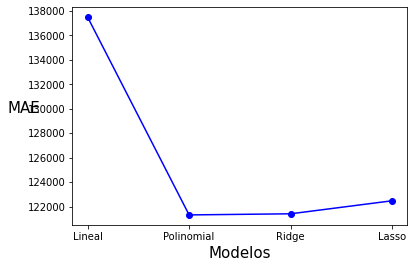

In [ ]:
modelos = ['Lineal', 'Polinomial', 'Ridge', 'Lasso']
plt.plot(modelos, lista_mae1, 'b-', marker = 'o')
plt.xlabel('Modelos', fontsize=15)
plt.ylabel('MAE', rotation=0, fontsize=15);

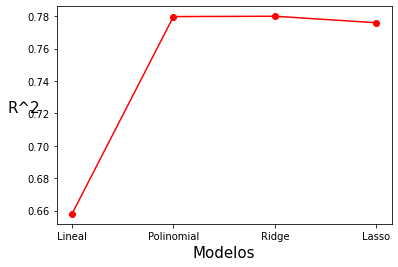

In [ ]:
modelos = ['Lineal', 'Polinomial', 'Ridge', 'Lasso']
plt.plot(modelos, lista_rc1, 'r-', marker = 'o')
plt.xlabel('Modelos', fontsize=15)
plt.ylabel('R^2', rotation=0, fontsize=15);

En este caso también se observa que el modelo lineal es muy simple para tratar de predecir el comportamiento de los datos. Para este problema los dos métodos que seleccionaría serían el modelo polinomial y el modelo polinomial con penalización Ridge, ya que con ambos se obtienen desempeños similares, y probablemente sería mejor opción el modelo Ridge, ya que este puede ser mejorado modificando el parámetro alfa para buscar un mejor desempeño. Con el modelo con penalización Lasso se obtuvo un desempeño similar a los anteriores, pero este método mostraba advertencias de convergencia para todos los hiperparámetros que se intentaron. Por lo tanto, en este caso, este método se descarta porque el tiempo necesario para que converja el modelo es demasiado.
Con los modelos se obtiene un error medio absoluto considerable, ya que se obtiene un error entre 121,313 y 137,480 con valores de la variable de salida entre un rango de 75,000 y 540,088, por lo tanto, no es un error aceptable.

Conclusiones  

Es importante apoyarse en la visualización de los datos cuando es posible, ya que con esto es posible proponer un modelo inicial, por lo tanto, se ahorra tiempo para seleccionar el modelo adecuado. En este problema me enfrenté con un problema de convergencia para el método de regresión Lasso. Es importante considerar esto porque se sacrifica tiempo con tal de lograr que el modelo converja, sin embargo, no se tiene la certeza de que el modelo se ajustará correctamente a los datos.